# DELHI AIR QUALITY INDEX-- ANALYSIS

## Importing the libraries

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data as a Pandas DataFrame

In [259]:
air = pd.read_csv("delhi_air_polution.csv")

## Display the first 5 rows

In [260]:
air.head()

date       co     no     no2     o3    so2   pm2_5    pm10  \
0  2020-11-25 01:00:00  2616.88   2.18   70.60  13.59  38.62  364.61  411.73   
1  2020-11-25 02:00:00  3631.59  23.25   89.11   0.33  54.36  420.96  486.21   
2  2020-11-25 03:00:00  4539.49  52.75  100.08   1.11  68.67  463.68  541.95   
3  2020-11-25 04:00:00  4539.49  50.96  111.04   6.44  78.20  454.81  534.00   
4  2020-11-25 05:00:00  4379.27  42.92  117.90  17.17  87.74  448.14  529.19   

     nh3  
0  28.63  
1  41.04  
2  49.14  
3  48.13  
4  46.61

## Cheaking the number of rows and columns 

In [261]:
air.shape

(18776, 9)

## Cheaking the duplicate values 

In [262]:
air.duplicated().sum()

0

There is no duplicate value in the dataset

## Displays a concise summary of the dataframe 

In [263]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Cheaking the missing values of the dataframe 

In [264]:
air.isna().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
date                0
co                  0
no                  0
no2                 0
o3                  0
so2                 0
pm2_5               0
pm10                0
nh3                 0

There is no missing values in the dataset

## Describing the dataframe 

In [265]:
air.describe()

co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000     33.930000      0.340000     34.810000   
50%     1842.500000      5.250000     54.150000     27.180000     52.930000   
75%     3685.000000     35.760000     83.630000     92.980000     82.020000   
max    21148.680000    500.680000    460.620000    801.090000    579.830000   

              pm2_5          pm10           nh3  
count  18776.000000  18776.000000  18776.000000  
mean     238.130309    300.092966     25.109815  
std      226.533625    267.165827     26.402108  
min       11.830000     15.070000      0.000000  
25%       84.440000    118.797500      9.630000  
50%      157.445000    209.705000     17.480000  
75%      313.000000    387.965000     30.400000  
max     1708.090000   1969.930000    287.770000

## Fetching only the columns with categorical values.

In [266]:
category_cols =air.select_dtypes(["object"]).head()
category_cols 

date
0  2020-11-25 01:00:00
1  2020-11-25 02:00:00
2  2020-11-25 03:00:00
3  2020-11-25 04:00:00
4  2020-11-25 05:00:00

Here 'date' is the only onject type variable

## Converting categorical value to datetime64 

In [267]:
air.date

0        2020-11-25 01:00:00
1        2020-11-25 02:00:00
2        2020-11-25 03:00:00
3        2020-11-25 04:00:00
4        2020-11-25 05:00:00
                ...         
18771    2023-01-24 04:00:00
18772    2023-01-24 05:00:00
18773    2023-01-24 06:00:00
18774    2023-01-24 07:00:00
18775    2023-01-24 08:00:00
Name: date, Length: 18776, dtype: object

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.

In [268]:
air['date'] = pd.to_datetime(air.date)

In [269]:
air['date']

0       2020-11-25 01:00:00
1       2020-11-25 02:00:00
2       2020-11-25 03:00:00
3       2020-11-25 04:00:00
4       2020-11-25 05:00:00
                ...        
18771   2023-01-24 04:00:00
18772   2023-01-24 05:00:00
18773   2023-01-24 06:00:00
18774   2023-01-24 07:00:00
18775   2023-01-24 08:00:00
Name: date, Length: 18776, dtype: datetime64[ns]

## Extracting different parts of the data into separate columns 

WE can see that it now has the datatype datetime64. We can now extract different parts of the data into separate columns.

In [270]:
air['year'] = air['date'].dt.year
air['month'] = air['date'].dt.month
air['day'] = air['date'].dt.day
air['weekday']=air['date'].dt.day_name()
air['hour'] = air['date'].dt.hour

In [271]:
seasons = { 1:'Winter', 2:'Winter', 3:'Spring', 4:'Summer', 5:'Summer',
            6:'Summer', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
air['seasons']=air['month'].map(seasons)

In [272]:
air

date       co     no     no2     o3     so2   pm2_5  \
0     2020-11-25 01:00:00  2616.88   2.18   70.60  13.59   38.62  364.61   
1     2020-11-25 02:00:00  3631.59  23.25   89.11   0.33   54.36  420.96   
2     2020-11-25 03:00:00  4539.49  52.75  100.08   1.11   68.67  463.68   
3     2020-11-25 04:00:00  4539.49  50.96  111.04   6.44   78.20  454.81   
4     2020-11-25 05:00:00  4379.27  42.92  117.90  17.17   87.74  448.14   
...                   ...      ...    ...     ...    ...     ...     ...   
18771 2023-01-24 04:00:00  1762.39   4.64   37.01  33.26   30.52  231.15   
18772 2023-01-24 05:00:00  1735.69   6.82   34.96  46.49   34.33  225.08   
18773 2023-01-24 06:00:00  1922.61   8.16   40.10  56.51   43.39  242.49   
18774 2023-01-24 07:00:00  1361.85   9.05   52.78  71.53  100.14  165.67   
18775 2023-01-24 08:00:00  1134.87   8.61   56.89  80.11  110.63  123.76   

         pm10    nh3  year  month  day    weekday  hour seasons  
0      411.73  28.63  2020     11   25  Wednesday     1  Autumn  
1      486.21  41.04  2020     11   25  Wednesday     2  Autumn  
2      541.95  49.14  2020     11   25  Wednesday     3  Autumn  
3      534.00  48.13  2020     11   25  Wednesday     4  Autumn  
4      529.19  46.61  2020     11   25  Wednesday     5  Autumn  
...       ...    ...   ...    ...  ...        ...   ...     ...  
18771  289.84   6.27  2023      1   24    Tuesday     4  Winter  
18772  280.52   9.12  2023      1   24    Tuesday     5  Winter  
18773  296.07  12.54  2023      1   24    Tuesday     6  Winter  
18774  191.82   7.47  2023      1   24    Tuesday     7  Winter  
18775  140.26   5.51  2023      1   24    Tuesday     8  Winter  

[18776 rows x 15 columns]

In [273]:
air.columns[1:9]

Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

## Cheaking the outliers 

WHAT IS AN OUTLIER?

Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range.

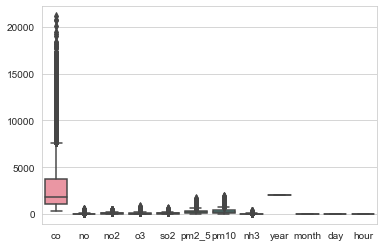

In [274]:
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(data=air)
plt.show()

There are so many outliers in each variable. It can affect our assumptions and results. 

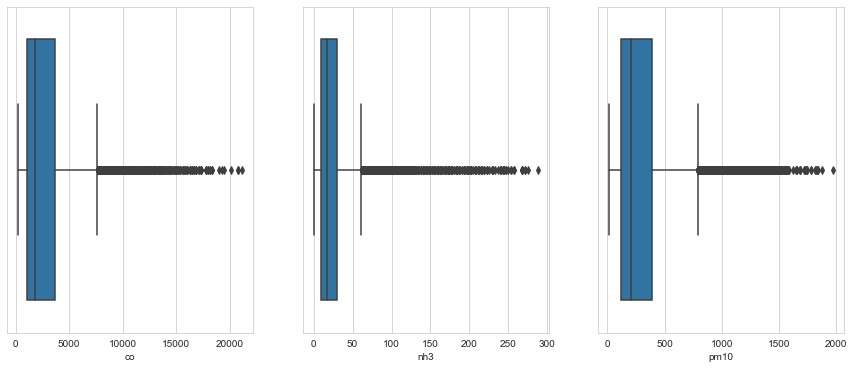

In [275]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(131)
sns.boxplot(data=air, x='co')

plt.subplot(132)
sns.boxplot(data=air, x='nh3')

plt.subplot(133)
sns.boxplot(data=air, x='pm10')
plt.show()

## Replacing the outliers with the median values 

In [276]:
for cols in air.columns[1:9]:
    if air[cols].dtype == object:
        continue
    else:
        Q1 = air[cols].quantile(q=0.25)
        Q3 = air[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        air.loc[(air[cols]>high)] = air[cols].median()
        air.loc[(air[cols]<low)] = air[cols].median()

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [277]:
air

date       co     no    no2     o3     so2   pm2_5  \
0      2020-11-25 01:00:00  2616.88   2.18  70.60  13.59   38.62  364.61   
1                    16.09    16.09  16.09  16.09  16.09   16.09   16.09   
2                    16.09    16.09  16.09  16.09  16.09   16.09   16.09   
3                    16.09    16.09  16.09  16.09  16.09   16.09   16.09   
4                    16.09    16.09  16.09  16.09  16.09   16.09   16.09   
...                    ...      ...    ...    ...    ...     ...     ...   
18771  2023-01-24 04:00:00  1762.39   4.64  37.01  33.26   30.52  231.15   
18772  2023-01-24 05:00:00  1735.69   6.82  34.96  46.49   34.33  225.08   
18773  2023-01-24 06:00:00  1922.61   8.16  40.10  56.51   43.39  242.49   
18774  2023-01-24 07:00:00  1361.85   9.05  52.78  71.53  100.14  165.67   
18775                40.05    40.05  40.05  40.05  40.05   40.05   40.05   

         pm10    nh3     year  month    day    weekday   hour seasons  
0      411.73  28.63  2020.00  11.00  25.00  Wednesday   1.00  Autumn  
1       16.09  16.09    16.09  16.09  16.09      16.09  16.09   16.09  
2       16.09  16.09    16.09  16.09  16.09      16.09  16.09   16.09  
3       16.09  16.09    16.09  16.09  16.09      16.09  16.09   16.09  
4       16.09  16.09    16.09  16.09  16.09      16.09  16.09   16.09  
...       ...    ...      ...    ...    ...        ...    ...     ...  
18771  289.84   6.27  2023.00   1.00  24.00    Tuesday   4.00  Winter  
18772  280.52   9.12  2023.00   1.00  24.00    Tuesday   5.00  Winter  
18773  296.07  12.54  2023.00   1.00  24.00    Tuesday   6.00  Winter  
18774  191.82   7.47  2023.00   1.00  24.00    Tuesday   7.00  Winter  
18775   40.05  40.05    40.05  40.05  40.05      40.05  40.05   40.05  

[18776 rows x 15 columns]

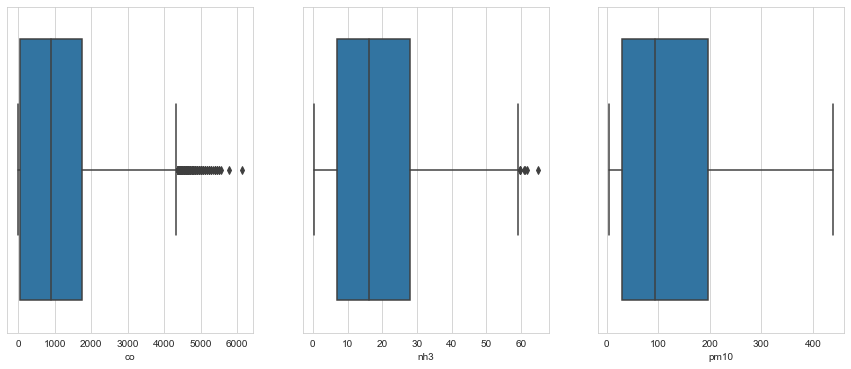

In [278]:
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
plt.subplot(131)
sns.boxplot(data=air, x='co')

plt.subplot(132)
sns.boxplot(data=air, x='nh3')

plt.subplot(133)
sns.boxplot(data=air, x='pm10')
plt.show()


Now we can see the number of outliers are reduced. Now we can use our data

## Pairplot 

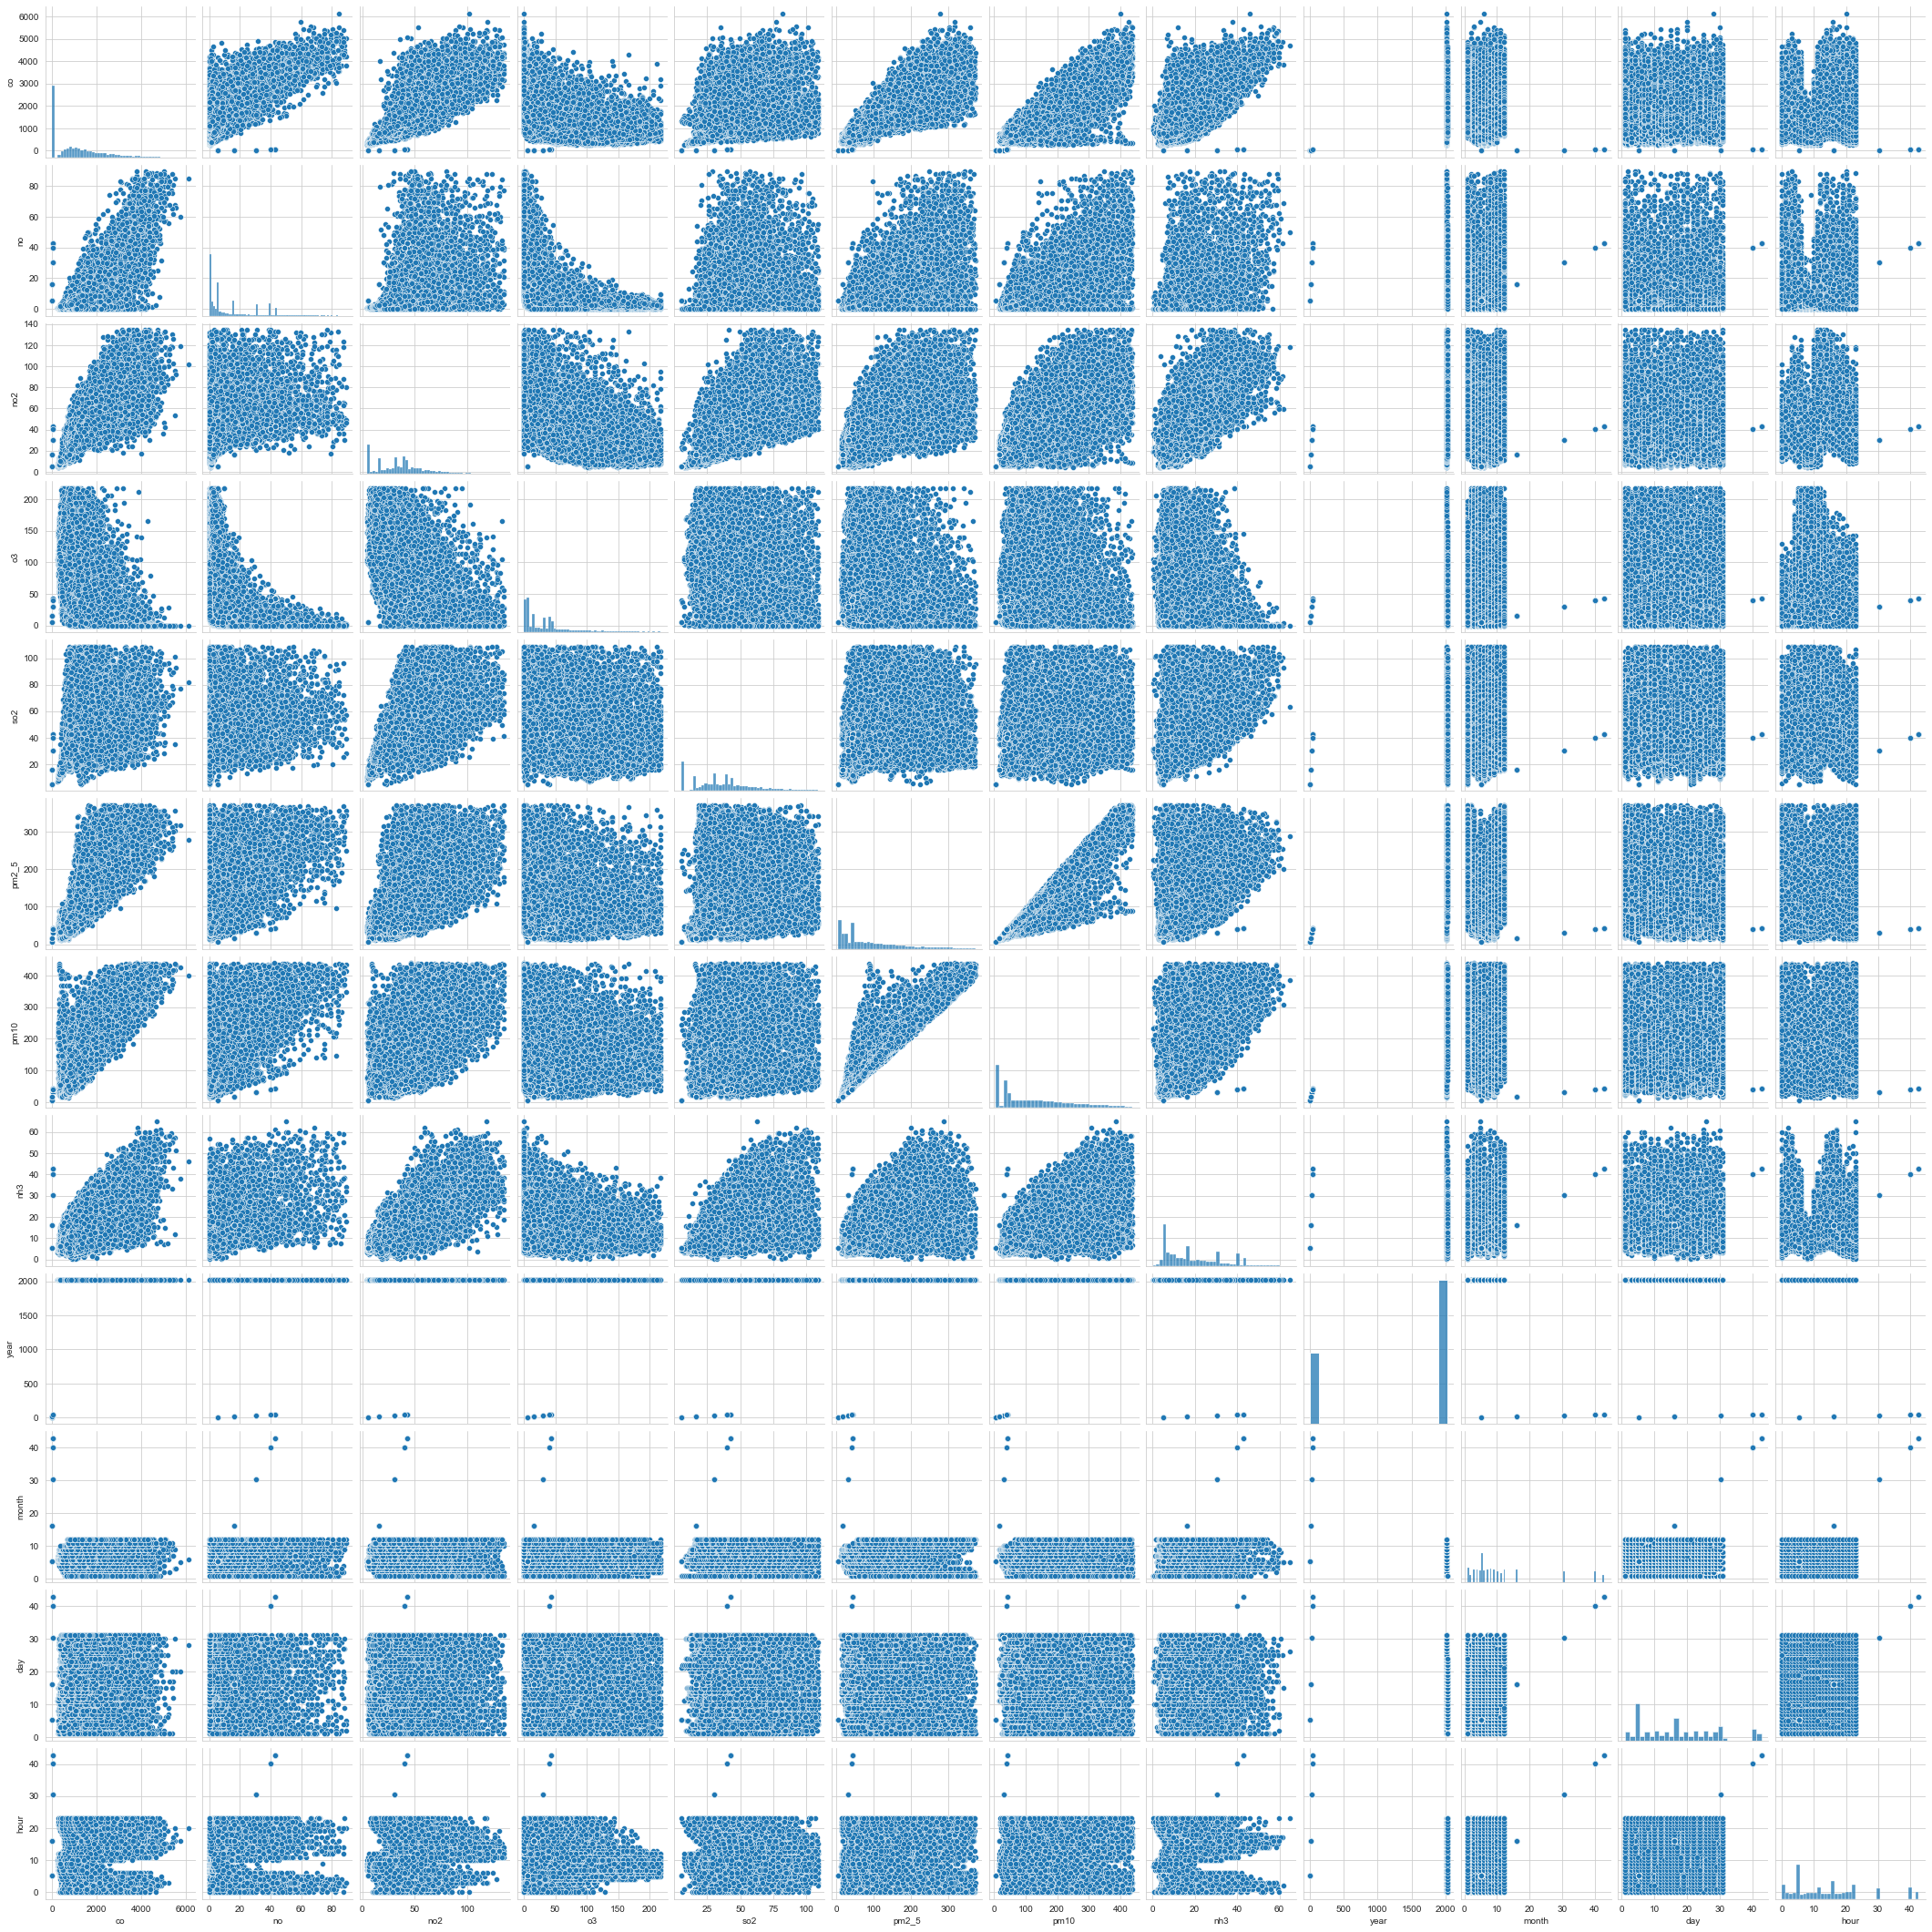

In [20]:
sns.pairplot(air)

##  Cheaking the correlation

In [21]:
plt.figure(figsize=(7,5))
air.corr().style.background_gradient(cmap="coolwarm")

<Figure size 504x360 with 0 Axes>

## Data visualization 

### 1)carbon monoxide (CO) effect on air quality

Carbon monoxide (CO) is a colorless, odorless gas. It results from the incomplete combustion of carbon-containing fuels such as natural gas, gasoline, or wood, and is emitted by a wide variety of combustion sources, including motor vehicles, power plants, wildfires, and incinerators. 
CO can cause dizziness, confusion, unconsciousness and death.

###  carbon monoxide during weekdays of different seasons

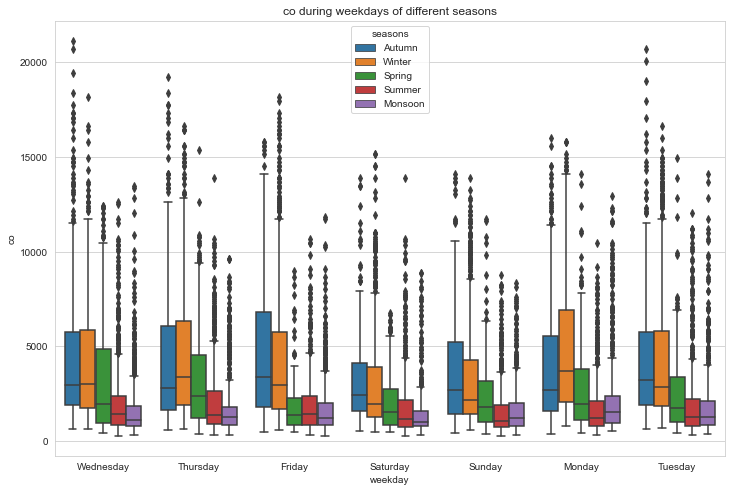

In [168]:
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='co', hue='seasons')
plt.title("co during weekdays of different seasons")
plt.show()

Here we can see during autumn, winter and spring season the CO is very large in air because the cold air is denser and moves slower than warm air, which affects co.

### CO during different hours  

<AxesSubplot:xlabel='hour', ylabel='co'>

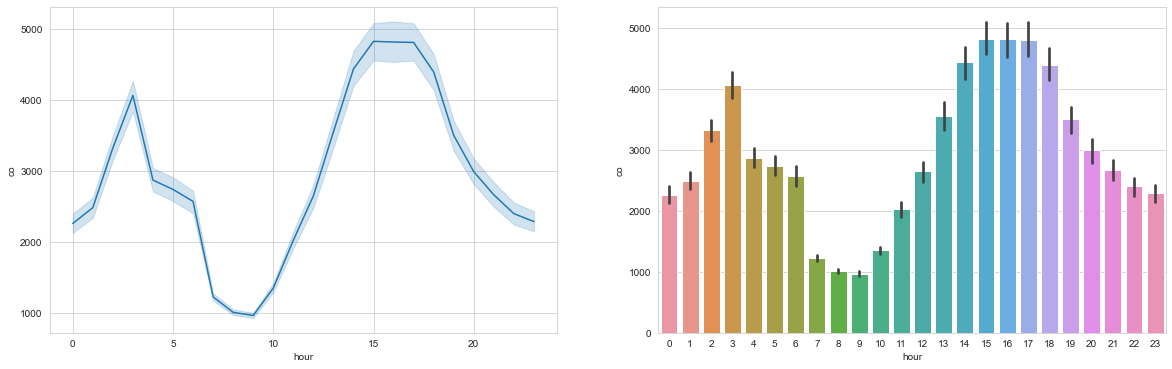

In [169]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.lineplot(data=air, x="hour", y="co")

plt.subplot(122)
sns.barplot(data=air, x="hour", y="co")

In morning the CO shows less as time goes from afternoon to night the CO goes on incresing due to heavy traffic and fatory hours.

### 2) nitrogen oxide (no) effect on air quality

Nitrogen oxides are critical components of photochemical smog. They produce the yellowish-brown colour of the smog. In poorly ventilated situations, indoor domestic appliances such as gas stoves and gas or wood heaters can be significant sources of nitrogen oxides. Smog is air pollution that reduces visibility 

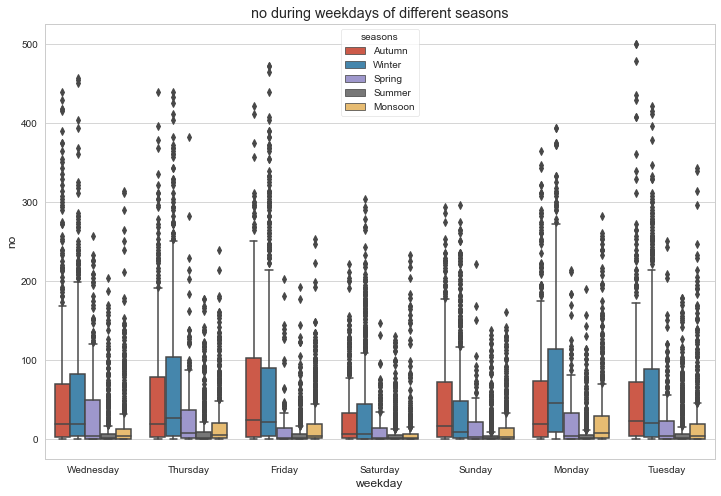

In [227]:
fig, ax= plt.subplots(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='no',hue='seasons')
plt.title("no during weekdays of different seasons")
plt.show()

Here we can see during autumn and winter season the no is very large in air because the cold air is denser and moves slower than warm air, which affects no. It also shows that during weekend NO is less as compared to weekdays because higher levels of NO occures due to heavy traffic congestion in delhi.

###  NO during different hours  

<AxesSubplot:xlabel='hour', ylabel='no'>

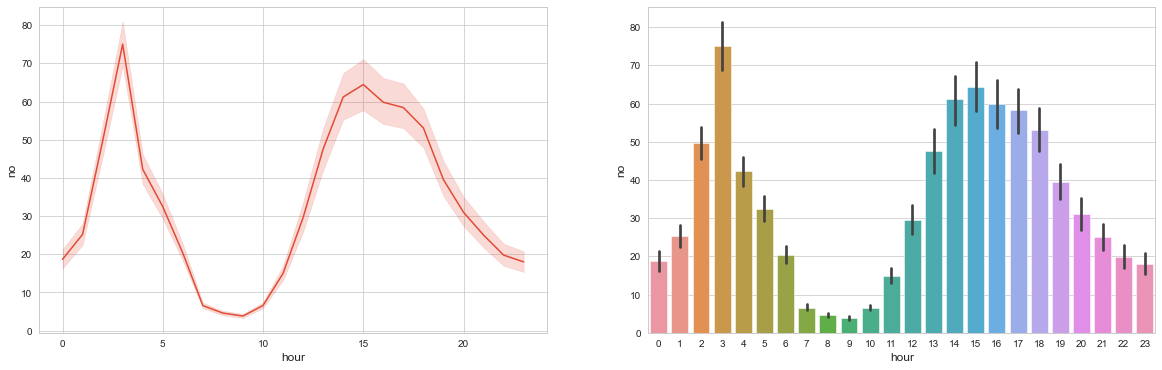

In [228]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.lineplot(data=air, x="hour", y="no")

plt.subplot(122)
sns.barplot(data=air, x="hour", y="no")

In morning the NO shows less as time goes from afternoon to night the CO goes on incresing due to heavy traffic and fatory hours.

## 3) Ozone (O3) effect on air quality
 

 Ground-level ozone comes from pollution emitted from cars, power plants, and chemical plants. It reduces overall productivity of plants and damaged the cells.

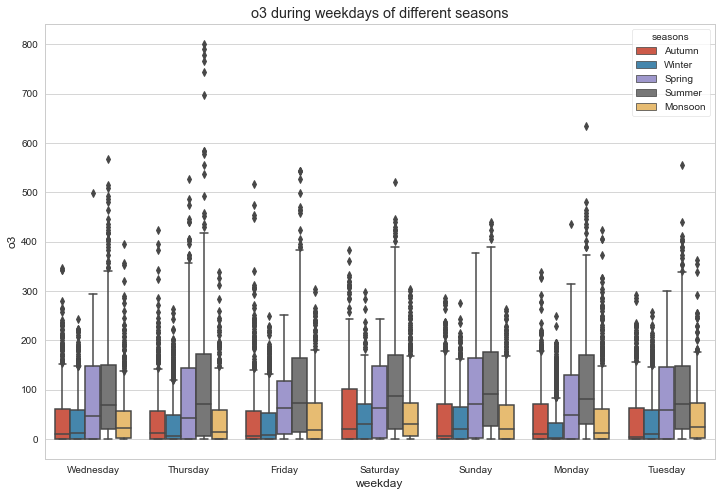

In [229]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='o3',hue='seasons')
plt.title("o3 during weekdays of different seasons")
plt.show()

Here we can see that O3 is very high in spring and summer because temp in delhi during summer is rises high so that as the weather heats up during the summer months, ground-level ozone pollution increases as pollutants react to heat and sunlight.

### O3 during different hours 

<AxesSubplot:xlabel='hour', ylabel='o3'>

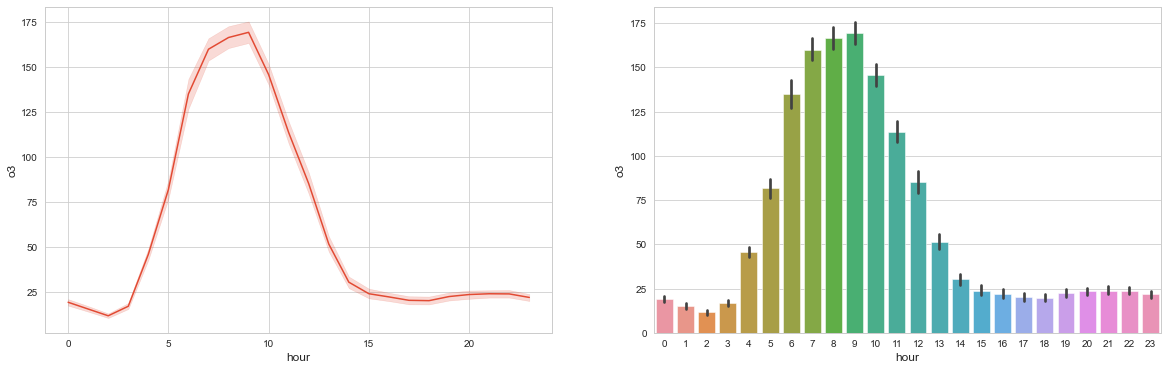

In [230]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.lineplot(data=air, x="hour", y="o3")

plt.subplot(122)
sns.barplot(data=air, x="hour", y="o3")

In morning O3 is very high for the heat of the sun.

##  Nitro dioxide(NO2), Sulfur dioxide(SO2), Ammonia(NH3) effect on air quality 

*Nitrogen dioxide is toxic to plants in short-term concentrations of 120 µg/m3. It reduces plant growth. When sulphur dioxide and ozone are also present, the effects on vegetation are worse. Along with sulphur dioxide, nitrogen dioxide can cause acid rain. 

*Sulfur dioxide can create secondary pollutants, such as sulfate aerosols, particulate matter, and acid rain, once released into the air.

*Ammonia is a colourless gas with a pungent odor that is noticeable at concentrations above 50 ppm. Most of the NH3 emitted is generated from livestock waste management and fertilizer production.Ammonia emissions can lead to increased acid depositions and excessive levels of nutrients in soil, rivers or lakes, which can have negative impacts on aquatic ecosystems and cause damage to forests, crops and other vegetation

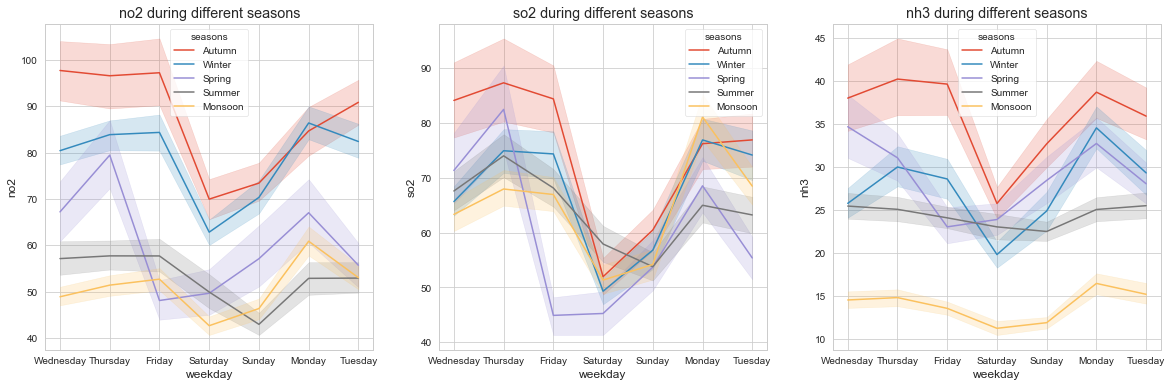

In [231]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.lineplot(data=air, x="weekday", y="no2", hue="seasons")
plt.title("no2 during different seasons")

plt.subplot(132)
sns.lineplot(data=air, x="weekday", y="so2", hue="seasons")
plt.title("so2 during different seasons")

plt.subplot(133)
sns.lineplot(data=air, x="weekday", y="nh3", hue="seasons")
plt.title("nh3 during different seasons")

plt.show()

*The highest amount of NO2 is found during autumn 

*The highest amount of SO2 is found during monsoon 

*The highest amount of NH3 is found during autumn and summer and winter



### In different hours 

Text(0.5, 1.0, 'nh3 in different hours')

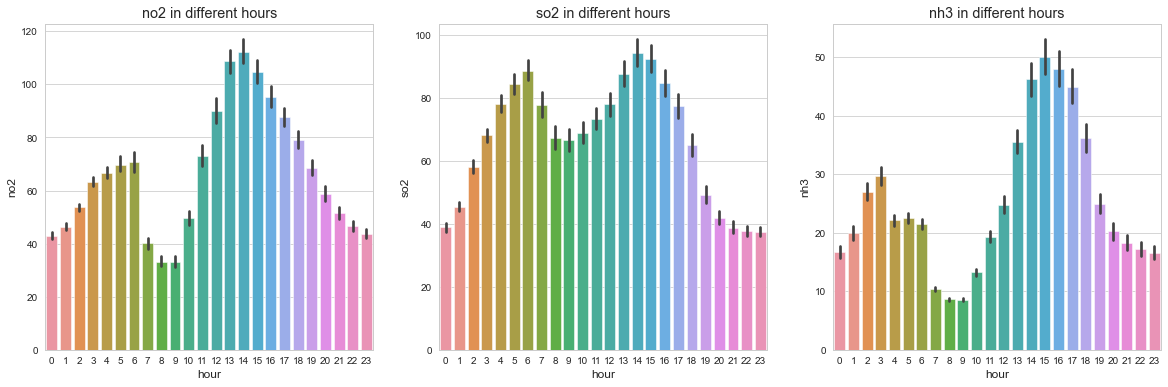

In [232]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.barplot(data=air, x="hour", y="no2")
plt.title("no2 in different hours")

plt.subplot(132)
sns.barplot(data=air, x="hour", y="so2")
plt.title("so2 in different hours")

plt.subplot(133)
sns.barplot(data=air, x="hour", y="nh3")
plt.title("nh3 in different hours")

In morning the NO2, SO2, Nh3 shows less as time goes from afternoon to night they goes on incresing due to heavy traffic and fatory hours.

## PM2_5  effect on air quality 

Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated. Fine particles primarily come from car, truck, bus and off-road vehicle (e.g., construction equipment, snowmobile, locomotive) exhausts, other operations that involve the burning of fuels such as wood, heating oil or coal and natural sources such as forest and grass fires. 

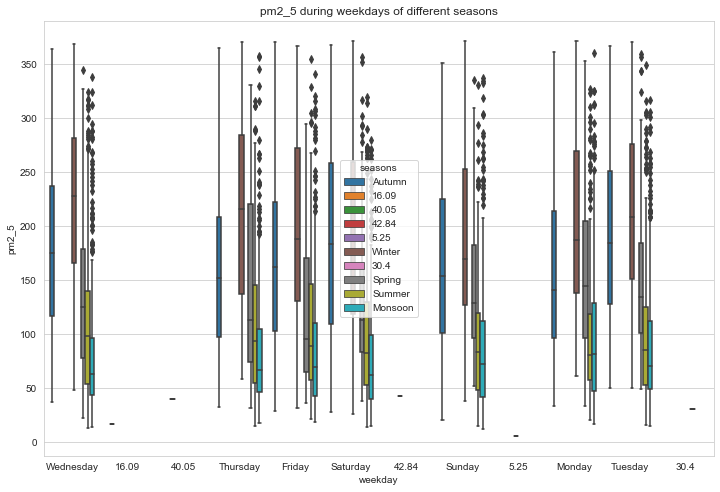

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='pm2_5' ,hue='seasons')
plt.title("pm2_5 during weekdays of different seasons")
plt.show()

Fine particulate matter (PM2.5) is very high in winter and autumn season in delhi 

###  In different hours 

<AxesSubplot:xlabel='hour', ylabel='pm2_5'>

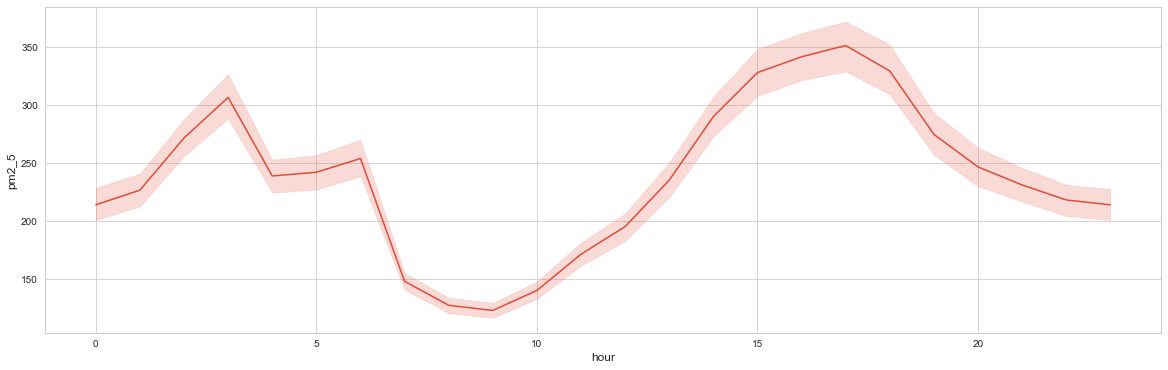

In [234]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=air, x="hour", y="pm2_5")

In morning the pm2.5 shows less as time goes from afternoon to night the pm2.5 goes on incresing due to heavy traffic and fatory hours.

## PM10 effect on air quality

PM10 refers to small particles of solid or liquid with an aerodynamic diameter smaller than 10 µm. Some examples are the dust blown off of mines, slash-and-burn agriculture, road and construction dust, wood-burning stoves, and fossil fuel power plants.

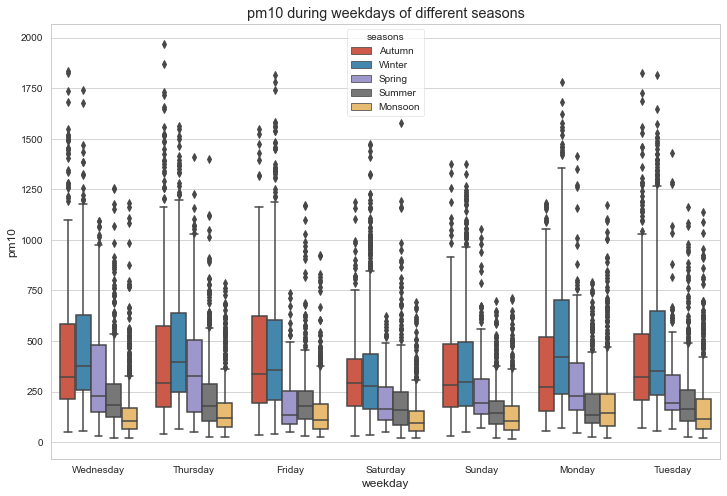

In [238]:
plt.figure(figsize=(12,8))
sns.boxplot(data=air,x='weekday',y='pm10' ,hue='seasons')
plt.title("pm10 during weekdays of different seasons")
plt.show()

Pm10 is very high in autumn and winter season in Delhi

###  In different hours 

<AxesSubplot:xlabel='hour', ylabel='pm10'>

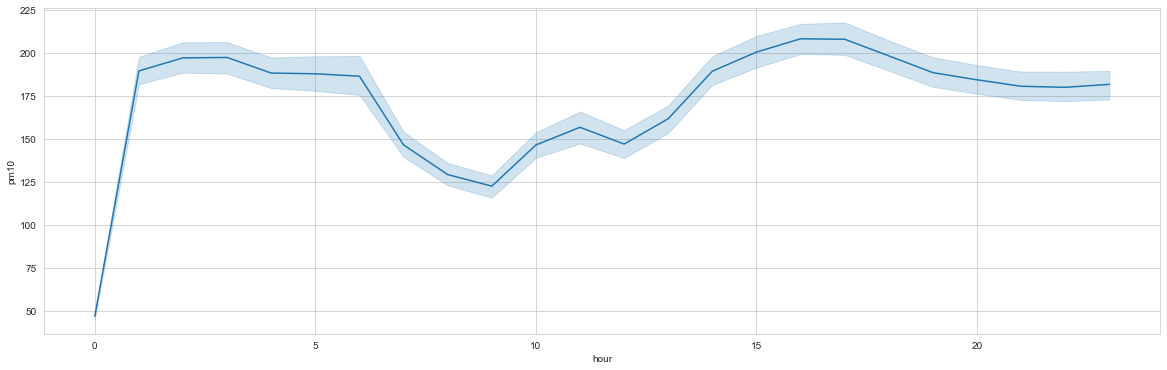

In [33]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=air, x="hour", y="pm10")

In morning the pm10 shows less as time goes from afternoon to night the pm10 goes on incresing due to heavy traffic and fatory hours.

## Comparison between the gases and pm10, pm2.5  

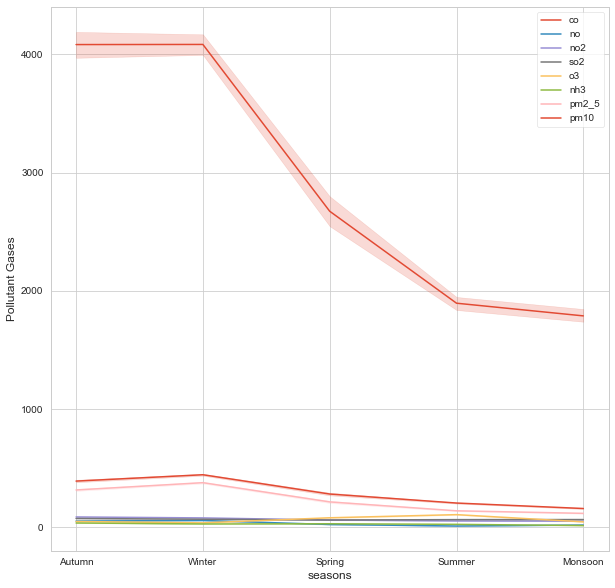

In [239]:
plt.figure(figsize=(10,10))
sns.lineplot(data = air , x = 'seasons' , y = "co",label = "co")
sns.lineplot(data = air , x = 'seasons' , y = "no",label = "no")
sns.lineplot(data = air , x = 'seasons' , y = "no2",label = "no2")
sns.lineplot(data = air , x = 'seasons' , y = "so2",label = "so2")
sns.lineplot(data = air , x = 'seasons' , y = "o3",label = "o3")
sns.lineplot(data = air , x = 'seasons' , y = "nh3",label = "nh3")
sns.lineplot(data = air , x = 'seasons' , y = "pm2_5",label = "pm2_5")
sns.lineplot(data = air , x = 'seasons' , y = "pm10",label = "pm10")

plt.ylabel("Pollutant Gases");

Here we can see that in Delhi air the amount of co is the highest rather than any other gases or pm2.5 or pm10 

## Average variable values during season

In [35]:
air.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()

C:\Users\anwes\AppData\Local\Temp\ipykernel_15172\3281589446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  air.groupby(by='seasons')['co','no','no2','o3','so2','pm2_5','pm10','nh3'].mean()


co         no        no2         o3        so2       pm2_5  \
seasons                                                                        
Autumn   2156.447232  13.479319  56.663142  53.678758  46.272677  172.666733   
Monsoon  1351.770098   8.972699  42.673067  41.910801  50.050847   84.345565   
Spring   1733.681744   9.315717  45.999333  76.987982  44.852594  139.313963   
Summer   1462.058255   4.938192  43.629643  79.706570  48.085031   99.789408   
Winter    670.232620  25.736617  39.437161  39.074655  36.384333   88.392783   

               pm10        nh3  
seasons                         
Autumn   217.586381  21.251004  
Monsoon  119.052774  12.105801  
Spring   188.821242  23.392849  
Summer   157.809684  21.631093  
Winter    99.510157  26.807938

## Conclusion 

 From the above data visualization it is clear that 
1. In winter and autumn season AQI is severe and in monsoon, spring and summer AQI is moderate (i.e. mostly Delhi air quality is bad)
2. Mostly in the morning session air quality is good as time goes upto night the Air quality is going up to severe condition

In [36]:
air

date        co      no     no2      o3  \
0     2020-11-25 01:00:00.000000000  2616.880   2.180  70.600  13.590   
1     1970-01-01 00:00:00.000000082    82.275  82.275  82.275  82.275   
2     1970-01-01 00:00:00.000000082    82.275  82.275  82.275  82.275   
3     1970-01-01 00:00:00.000000082    82.275  82.275  82.275  82.275   
4     1970-01-01 00:00:00.000000082    82.275  82.275  82.275  82.275   
...                             ...       ...     ...     ...     ...   
18771 2023-01-24 04:00:00.000000000  1762.390   4.640  37.010  33.260   
18772 2023-01-24 05:00:00.000000000  1735.690   6.820  34.960  46.490   
18773 2023-01-24 06:00:00.000000000  1922.610   8.160  40.100  56.510   
18774 2023-01-24 07:00:00.000000000  1361.850   9.050  52.780  71.530   
18775 1970-01-01 00:00:00.000000040    40.050  40.050  40.050  40.050   

           so2    pm2_5     pm10     nh3  year  month  day    weekday  hour  \
0       38.620  364.610  411.730  28.630  2020     11   25  Wednesday     1   
1       82.275   82.275   82.275  82.275  1970      1    1   Thursday     0   
2       82.275   82.275   82.275  82.275  1970      1    1   Thursday     0   
3       82.275   82.275   82.275  82.275  1970      1    1   Thursday     0   
4       82.275   82.275   82.275  82.275  1970      1    1   Thursday     0   
...        ...      ...      ...     ...   ...    ...  ...        ...   ...   
18771   30.520  231.150  289.840   6.270  2023      1   24    Tuesday     4   
18772   34.330  225.080  280.520   9.120  2023      1   24    Tuesday     5   
18773   43.390  242.490  296.070  12.540  2023      1   24    Tuesday     6   
18774  100.140  165.670  191.820   7.470  2023      1   24    Tuesday     7   
18775   40.050   40.050   40.050  40.050  1970      1    1   Thursday     0   

      seasons  
0      Autumn  
1      Winter  
2      Winter  
3      Winter  
4      Winter  
...       ...  
18771  Winter  
18772  Winter  
18773  Winter  
18774  Winter  
18775  Winter  

[18776 rows x 15 columns]

## Predicting PM10 with linear regression 

## Choose target and features 

In [203]:
x= (air.iloc[:,9:14]).drop(['weekday'], axis=1) #feature
y= air.iloc[:,7] #target

In [204]:
x

year  month  day  hour
0      2020     11   25     1
1      2020     11   25     2
2      2020     11   25     3
3      2020     11   25     4
4      2020     11   25     5
...     ...    ...  ...   ...
18771  2023      1   24     4
18772  2023      1   24     5
18773  2023      1   24     6
18774  2023      1   24     7
18775  2023      1   24     8

[18776 rows x 4 columns]

In [188]:
y

0        411.73
1        486.21
2        541.95
3        534.00
4        529.19
          ...  
18771    289.84
18772    280.52
18773    296.07
18774    191.82
18775    140.26
Name: pm10, Length: 18776, dtype: float64

## Spliting the data into training data and testing data 

In [189]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, 
                                                   random_state=42)

In [190]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (13143, 8)
x_test shape: (5633, 8)
y_train shape: (13143,)
y_test shape: (5633,)


## Cheaking the test and train data 

In [191]:
x_train

co     no     no2      o3     so2   pm2_5    pm10    nh3
6369    934.60   0.96   19.02  274.66   51.02  210.25  313.71   8.99
3597    781.06   0.00   22.28   91.55   31.95   44.23   58.13  20.52
2201   2883.91   2.79   81.57    5.28   43.39  226.36  290.68  31.67
8453   5393.98   9.05   97.33  191.69   79.15  664.36  753.29  35.46
1579   1762.39   0.47   53.47   13.41   17.17  162.38  190.22   8.61
...        ...    ...     ...     ...     ...     ...     ...    ...
11284  2323.15  16.09   64.43   80.82   41.48  156.62  213.46  26.09
11964   854.49   0.24   33.24  140.19   33.86   56.03   84.42  15.20
5390    947.95   0.00   45.24   64.37   57.22   69.19  214.80  17.73
860    2883.91  17.43   63.06    0.09   23.60  277.20  328.63   6.84
15795  2670.29  16.09  106.93   77.96  175.48  367.49  449.51   8.74

[13143 rows x 8 columns]

In [192]:
x_test

co      no     no2      o3     so2   pm2_5    pm10    nh3
10876  8010.86  119.81  178.22   27.18  125.89  733.06  862.67  38.50
13204  2002.72    4.86   62.38  280.38  103.95  227.50  371.13  32.93
1862   9933.47  193.12  120.64    0.00  101.09  788.85  973.97  64.34
2699    947.95    0.16   43.53  141.62   49.59   87.02  142.51  14.31
18191  1455.31    0.28   32.22   15.20   19.55  249.47  267.97   4.18
...        ...     ...     ...     ...     ...     ...     ...    ...
18308  2456.67    0.39   53.47   15.20   22.65  310.27  352.76   6.46
11368  1602.17    0.00   42.50   63.66   40.05  157.87  214.79  30.91
5751   4646.30    2.40  128.87    3.76   66.76  320.88  397.25  20.52
7828   1869.20   31.29   33.59    0.26   72.48  104.25  125.91  11.91
14786  2456.67   27.94   65.80   14.84   90.60  142.20  180.39  17.73

[5633 rows x 8 columns]

In [193]:
y_train

6369     313.71
3597      58.13
2201     290.68
8453     753.29
1579     190.22
          ...  
11284    213.46
11964     84.42
5390     214.80
860      328.63
15795    449.51
Name: pm10, Length: 13143, dtype: float64

In [194]:
y_test

10876    862.67
13204    371.13
1862     973.97
2699     142.51
18191    267.97
          ...  
18308    352.76
11368    214.79
5751     397.25
7828     125.91
14786    180.39
Name: pm10, Length: 5633, dtype: float64

## Importing and fitting the model on training data

In [195]:
from sklearn.linear_model import LinearRegression

air_model = LinearRegression()
air_model.fit(x_train, y_train)

LinearRegression()

## Checking the slope m and the intercept c 

In [196]:
m = air_model.coef_
c = air_model.intercept_

m,c

(array([ 8.16030960e-16, -2.49949314e-17, -2.53362007e-18,  1.20059856e-17,
         2.98081799e-17, -3.37311908e-16,  1.00000000e+00,  2.63654856e-17]),
 -2.4442670110147446e-12)

## Predicting the target 

### predicting on training data 

In [197]:
y_pred_train = air_model.predict(x_train)
y_pred_train

array([313.71,  58.13, 290.68, ..., 214.8 , 328.63, 449.51])

### predicting on testing data 

In [198]:
y_pred_test = air_model.predict(x_test)
y_pred_test

array([862.67, 371.13, 973.97, ..., 397.25, 125.91, 180.39])

## Cheaking mean squared error of our model 

### For training data 

In [199]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_train, y_pred_train)

5.6236777636504204e-24

### For testing data

In [200]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred_test)

5.509678797730635e-24

## Cheaking model accuracy 

### For training data 

In [201]:
accuracy = r2_score(y_train, y_pred_train)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 100.0


### For testing data 

In [202]:
accuracy = r2_score(y_test, y_pred_test)
print("the model has an accuracy of", accuracy*100)

the model has an accuracy of 100.0


## Cheaking r2_score

### For training data 

In [127]:
r2score_train= r2_score(y_train, y_pred_train)
r2score_train

0.4458117339483598

### For testing data 

In [128]:
r2score_test= r2_score(y_test, y_pred_test)
r2score_test

0.43786848007668155

## Visualize the actual PM10 and predicted PM10

In [259]:
air_df = pd.DataFrame({"Actual": y_test,
                       "Predicted": y_pred_test,
                       "Error": abs(y_test-y_pred_test)})

air_df.head().style.background_gradient(cmap="RdYlGn")

In [260]:
air_df.Error.describe()

count     5633.000000
unique    5633.000000
top        607.070575
freq         1.000000
Name: Error, dtype: float64

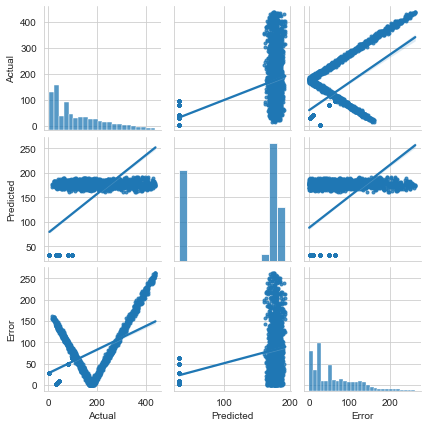

In [88]:
sns.pairplot(air_df.iloc[0:], kind="reg", height=2, markers=".")

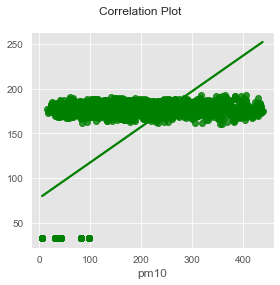

In [89]:
plt.style.use('ggplot')
plt.figure(figsize=(4, 4))
sns.regplot(x=y_test, 
            y=y_pred_test, 
            ci=None, 
            color="g")

plt.suptitle("Correlation Plot")
plt.tight_layout()
plt.show()

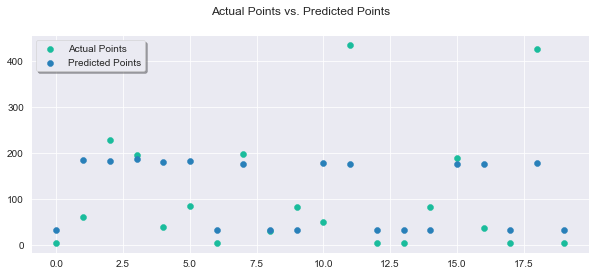

In [90]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')

plt.scatter(x=range(20),
           y=y_test.head(20),
           color="#1abc9c",
           label="Actual Points")
plt.scatter(x=range(20),
           y=y_pred_test[:20],
           color="#2980b9",
           label="Predicted Points")

plt.suptitle("Actual Points vs. Predicted Points")
plt.legend(shadow=True,
           loc="best")
plt.show()

In [91]:
x_test.tail()

year  month  day  hour
14198  1970      1    1     0
15155  2022      8   23    12
1281   2021      1   17    10
14673  2022      8    3    10
8164   1970      1    1     0

In [92]:
y_test.tail()

14198      5.25
15155     28.61
1281     282.82
14673     74.86
8164      42.84
Name: pm10, dtype: float64

## Let's predict on the new data 

In [93]:
features = pd.DataFrame({'year':[1970,2022], 
 'month':[1,8], 
 'day':[1,3], 
 'hour':[0,10]}, index=[0, 1])

features

year  month  day  hour
0  1970      1    1     0
1  2022      8    3    10

In [94]:
air_model.predict(features)

array([ 32.79472656, 180.97645515])